<img style="margin: 0 auto;" src="https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png">

# Desafío - Naive Bayes

Luis Porras

### Descripción

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto.


* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.


* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.


* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

### Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos numpy, pandas, matplotlib, seaborn, glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump.


* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.


* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [3]:
# Librerías básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import glob
import os

warnings.filterwarnings(action='ignore')

# Configuración de gráficas
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["figure.dpi"] = 80
sns.set_style('darkgrid')

In [63]:
pd.read_csv(os.getcwd() +  '/' + glob.glob('dump/*.csv')[0]).head()

,Unnamed: 0,0,1,2,3
0,0,Public Enemy,hiphop,You're Gonna Get Yours,"(Flavor Flav) \n Oh-oh Chuck, they out to get ..."
1,1,Public Enemy,hiphop,Sophisticated Bitch,"That woman in the corner, cold playin' the rol..."
2,2,Public Enemy,hiphop,Miuzi Weighs A Ton,"Yo Chuck, run a power move on them \n (Yeah) \..."
3,3,Public Enemy,hiphop,Timebomb,"(Intro - Flavor Flav) \n Hey, Chuck, we got so..."
4,4,Public Enemy,hiphop,Too Much Posse,(Intro - Flavor Flav) \n What do you got to sa...


In [45]:
# Recuperar la Lista con todos los .csv en la carpeta dump
current_path = os.getcwd()
dump_dfs = list(map(lambda path: pd.read_csv(current_path + '/' + path), glob.glob('dump/*.csv')))
df = pd.concat(dump_dfs).drop(columns=['Unnamed: 0'])
df.columns = ['artist', 'genre', 'song', 'lyrics']
df.sample(5)

,artist,genre,song,lyrics
53,Mobb Deep,hiphop,Quiet Storm,(Havoc) \n In broad daylight get right... \n J...
117,Red Hot Chili Peppers,rock,I Could Die For You,Something inside the cards I know is right \n ...
0,Spice Girls,pop,Wannabe,"Yo, I'll tell you what I want, what I really, ..."
177,Raekwon,hiphop,Wake Up,"(One) gun go off, showin' everything is lost \..."
60,Eminem,hiphop,If I Get Locked Up Tonight,"Dr. Dre \n Check check \n One, two \n One, two..."


### Ejercicio 2: Descripción de los datos

* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

    
* Comente sobre las principales tendencias.

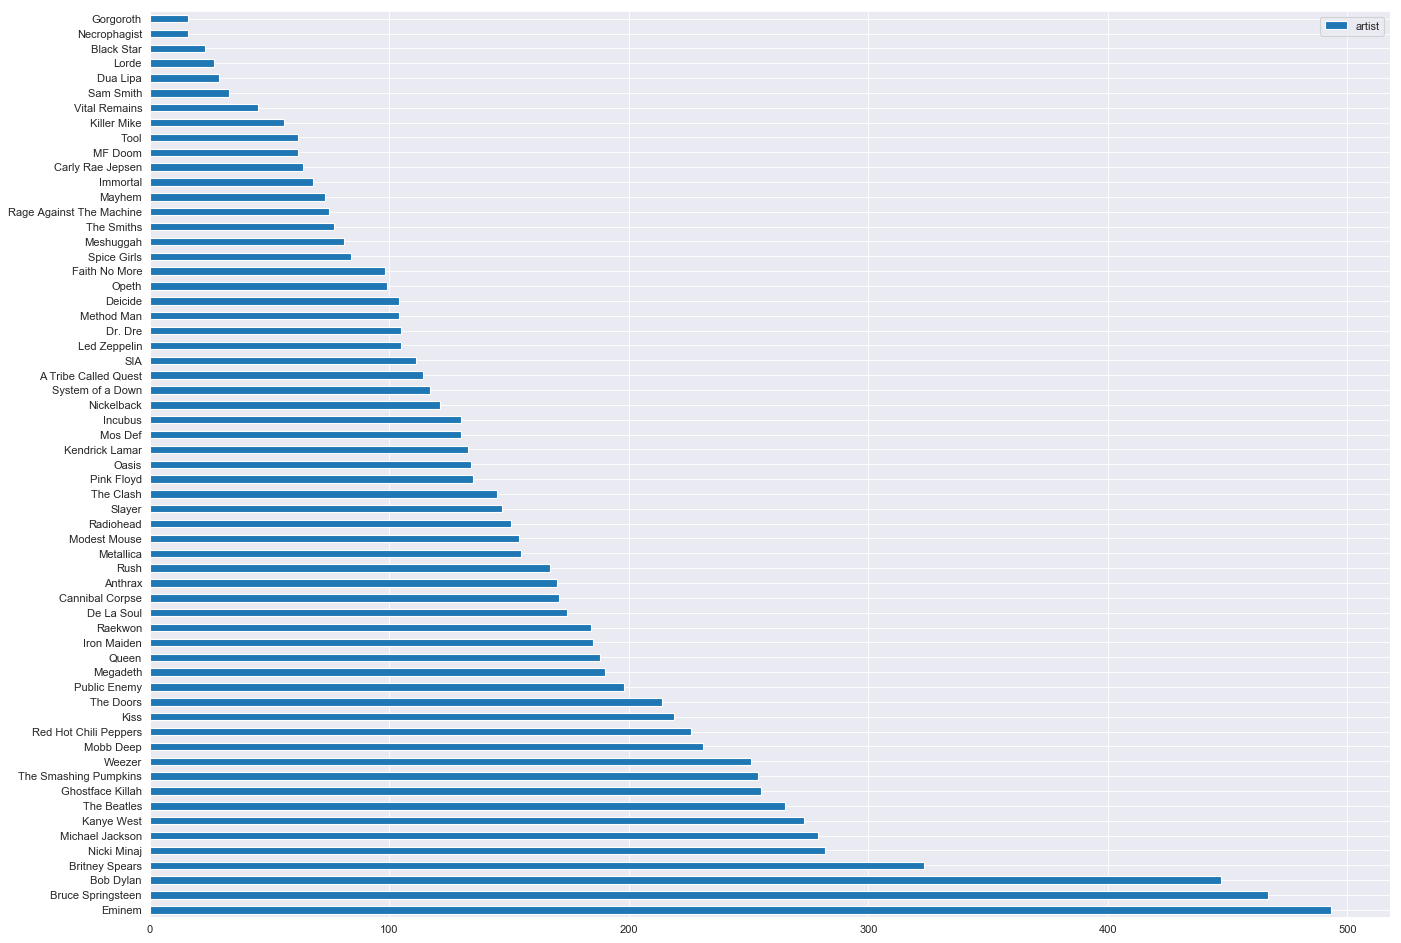

In [53]:
df['artist'].value_counts(ascending=False).to_frame().plot.barh()

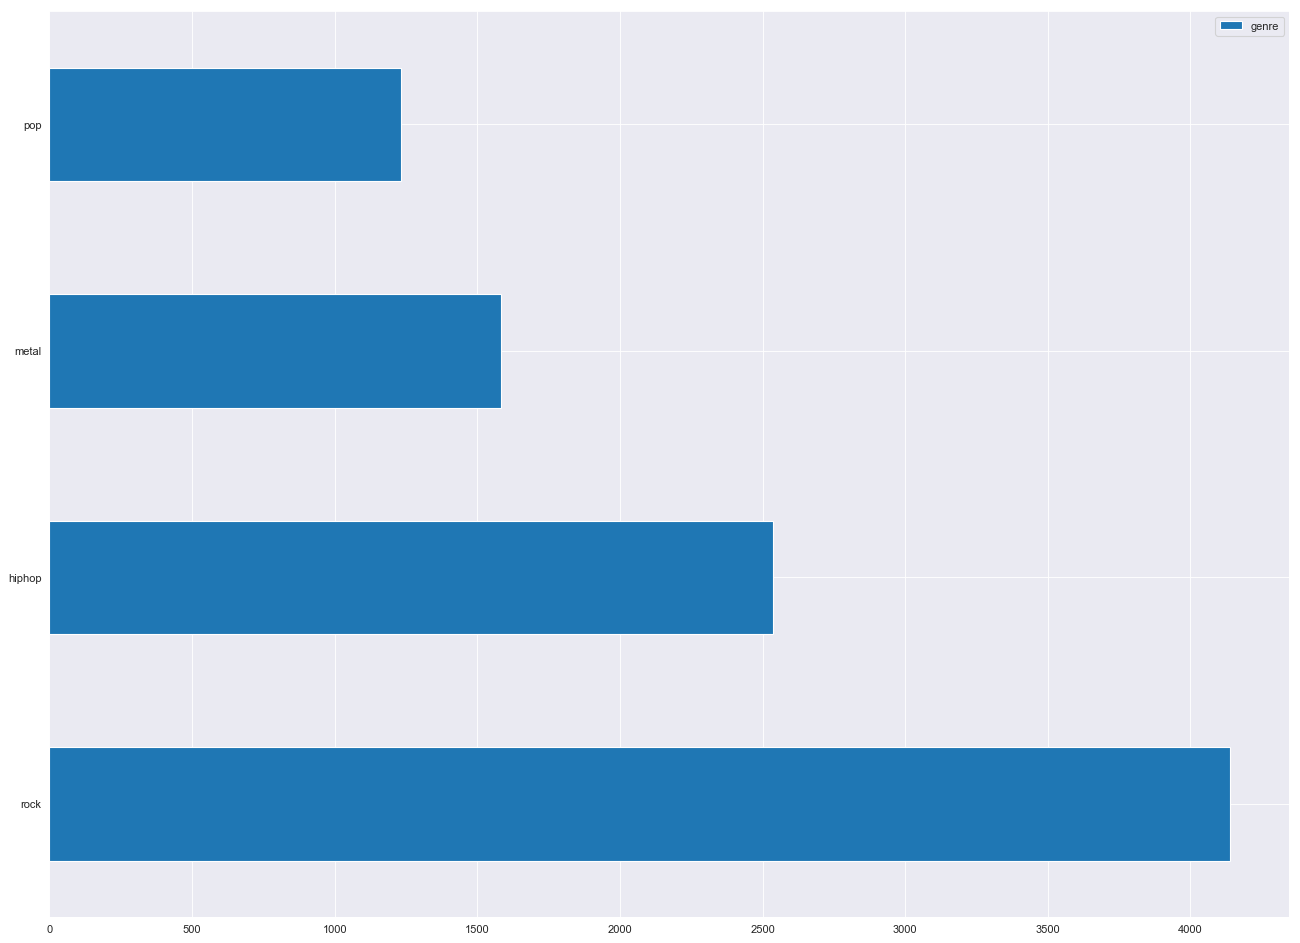

In [54]:
df['genre'].value_counts(ascending=False).to_frame().plot.barh()

Los artistas con más canciones son Eminem, Bruce Springsteen, Bob Dylan, y Britney Spears.

La mayoría de las canciones se encuentran en los géneros HipHop y Rock

### Ejercicio 3: Matriz de ocurrencias


* **Digresión: Tokenización de Textos**

    Para poder trabajar con textos, debemos pasarlos a una **matriz dispersa**, donde cada fila representará una entrada (en este caso, una canción), y cada columna **representará una palabra (token)**. Este es el proceso de tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus). El tokenizador más simple `sklearn.feature_extraction.text.CountVectorizer` genera una colección de textos a una matriz que representa la frecuencia dentro del texto de una palabra específica. El tokenizador funciona de la siguiente manera:
    
```python

from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
```
    
    
* Importe la clase `CountVectorizer` dentro de los módulos `feature_extraction.text` de la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?
* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
* Genere una función que replique el procedimiento para cada uno de los géneros.
* Comente sobre las principales características de cada género en cuanto a sus palabras.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

def most_frequent_words(df):
    # inicializamos el CountVectorizer
    count_vectorizer = CountVectorizer(stop_words='english')
    # Implementamos los pasos fit y transform
    lyrics_count = count_vectorizer.fit_transform(df['lyrics'])
    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()
    # extraemos frecuencia
    words_freq = lyrics_count.toarray().sum(axis=0)
    # devolvemos las 100 palabras más frecuentes
    return pd.DataFrame({ 'freq': words_freq }, index=words).sort_values(by='freq', ascending=False)[:100]

In [66]:
most_frequent_words(df)

,freq
like,19629
don,17398
know,14962
got,14171
just,13978
love,11268
yeah,11071
ll,10028
oh,9879
cause,8356


* Comente sobre las principales características de cada género en cuanto a sus palabras.

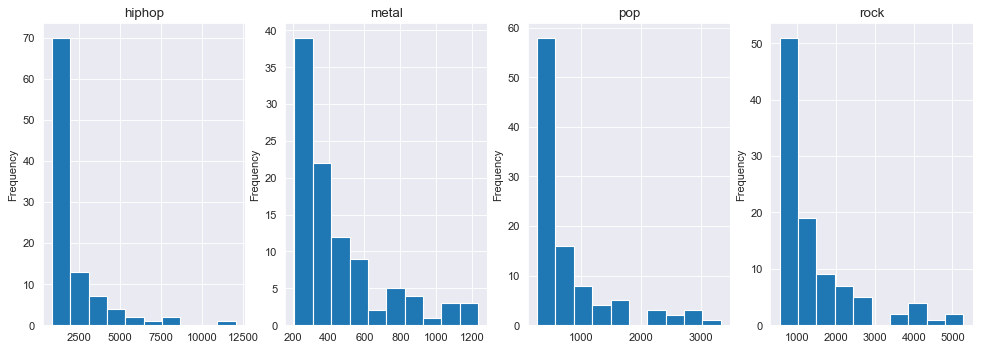

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(15,5))
n = 0

for name, group in df.groupby(by='genre'):
    most_frequent_words(group)['freq'].plot.hist(ax=ax[n])
    ax[n].set_title(name)
    n += 1

Podemos ver que todos los géneros contienen una palabra que tiene una frecuencia muy elevada en comparación con el resto.

### Ejercicio 4: Entrenamiento del Modelo
* **Digresión: sklearn Pipelines**

    La clase `Pipeline` del módulo `sklearn.pipeline` permite concatenar múltiples pasos de procesamiento y preprocesamiento en un estimador generado por algún método de `scikit-learn` . En sí, la clase cuenta con los métodos clásicos `fit` , `predict` y `score` y presenta un comportamiento idéntico a los demás objetos de scikit-learn . Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.
    

* **Componentes de un Pipeline**

    Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de datos, deseo Estandarlizarlo, posteriormente extraer sus principales componentes y finalmente aplicar un modelo de regresión lineal. Este flujo se puede reexpresar como:
       
```python
pipeline_model = Pipeline([('scale', StandardScaler()),
                            ('pca', RandomizedPCA(n_components=3)),
                            ('model', LinearRegression())])
```
Algunos de los elementos a considerar:
1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la función
a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo que
asociamos el método StandardScaler con el string scale .
2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso
representa el orden de ejecución.
Posteriormente el objeto creado puede utilizarse con los siguientes métodos

```python
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(y_test)
```

* Importe `MultinomialNB` , `train_test_split` , `Pipeline` , `confusion_matrix` y `classification_report`.
* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un Pipeline , donde el primer paso es implementar `CountVectorizer` y el segundo sea ejecutar el clasificador `MultinomialNB`.
* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?

```python
['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]
```

* Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [68]:
# importamos las funciones de Machine Learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [83]:
y = df['genre']
X = df['lyrics']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.4, random_state = 240008947)

pipeline_model = Pipeline([('counter', CountVectorizer(stop_words='english')),
                            ('model', MultinomialNB())])

pipeline_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('counter', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [84]:
# Predicciones:

to_predict = ['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]

print('Las predicciones son:', ', '.join(pipeline_model.predict(to_predict)), 'respectivamente')

Las predicciones son: rock, metal, rock, pop, rock respectivamente


In [85]:
# Reporte de clasificación
y_hat = pipeline_model.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

      hiphop       0.84      0.94      0.88      1032
       metal       0.84      0.71      0.77       618
         pop       0.66      0.36      0.47       499
        rock       0.77      0.86      0.81      1647

   micro avg       0.79      0.79      0.79      3796
   macro avg       0.78      0.72      0.73      3796
weighted avg       0.78      0.79      0.78      3796



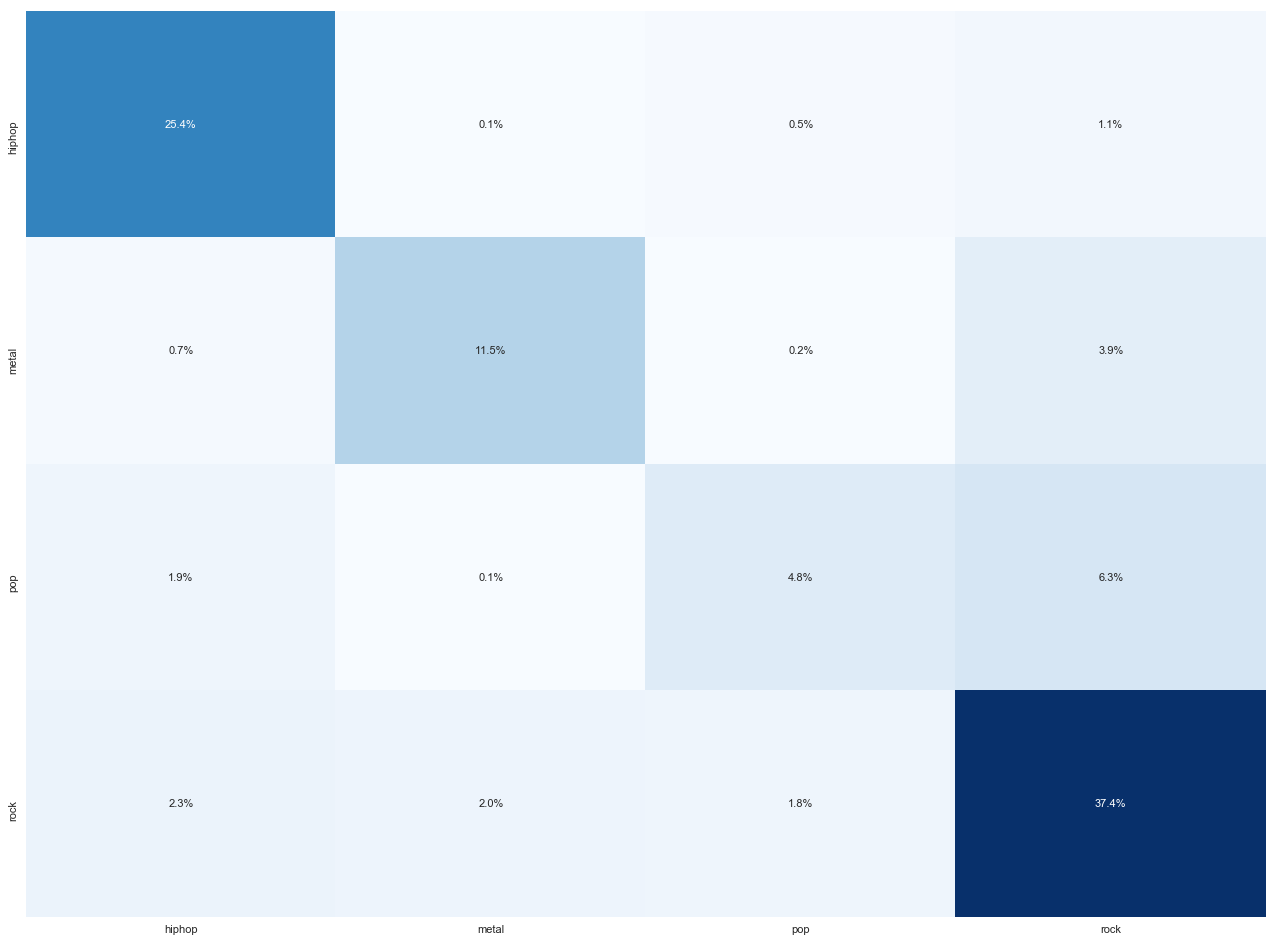

In [86]:
# Matriz de confución:

cnf = confusion_matrix(y_test, y_hat) / len(y_test)

sns.heatmap(cnf, xticklabels=pipeline_model.classes_, yticklabels=pipeline_model.classes_, annot=True, fmt=".1%", cbar=False, cmap='Blues')

#### Observaciones

- Según el reporte de clasificación el modelo nos permite clasificar el 80% de los casos.
- El genero que se clasifica de forma ineficiente es el Pop.


### Ejercicio 5: Mejora del Modelo

* Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
* Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
* Comente sobre el desempeño general de éste.

Podemos utilizar más datos en la muestra, como las canciones contenidas en el folder `dump_plus_pop`, para mejorar la clasificación del género pop

              precision    recall  f1-score   support

      hiphop       0.89      0.92      0.91      1990
       metal       0.86      0.79      0.82      1307
         pop       0.73      0.68      0.70      1499
        rock       0.82      0.85      0.83      3322

   micro avg       0.83      0.83      0.83      8118
   macro avg       0.82      0.81      0.82      8118
weighted avg       0.82      0.83      0.82      8118



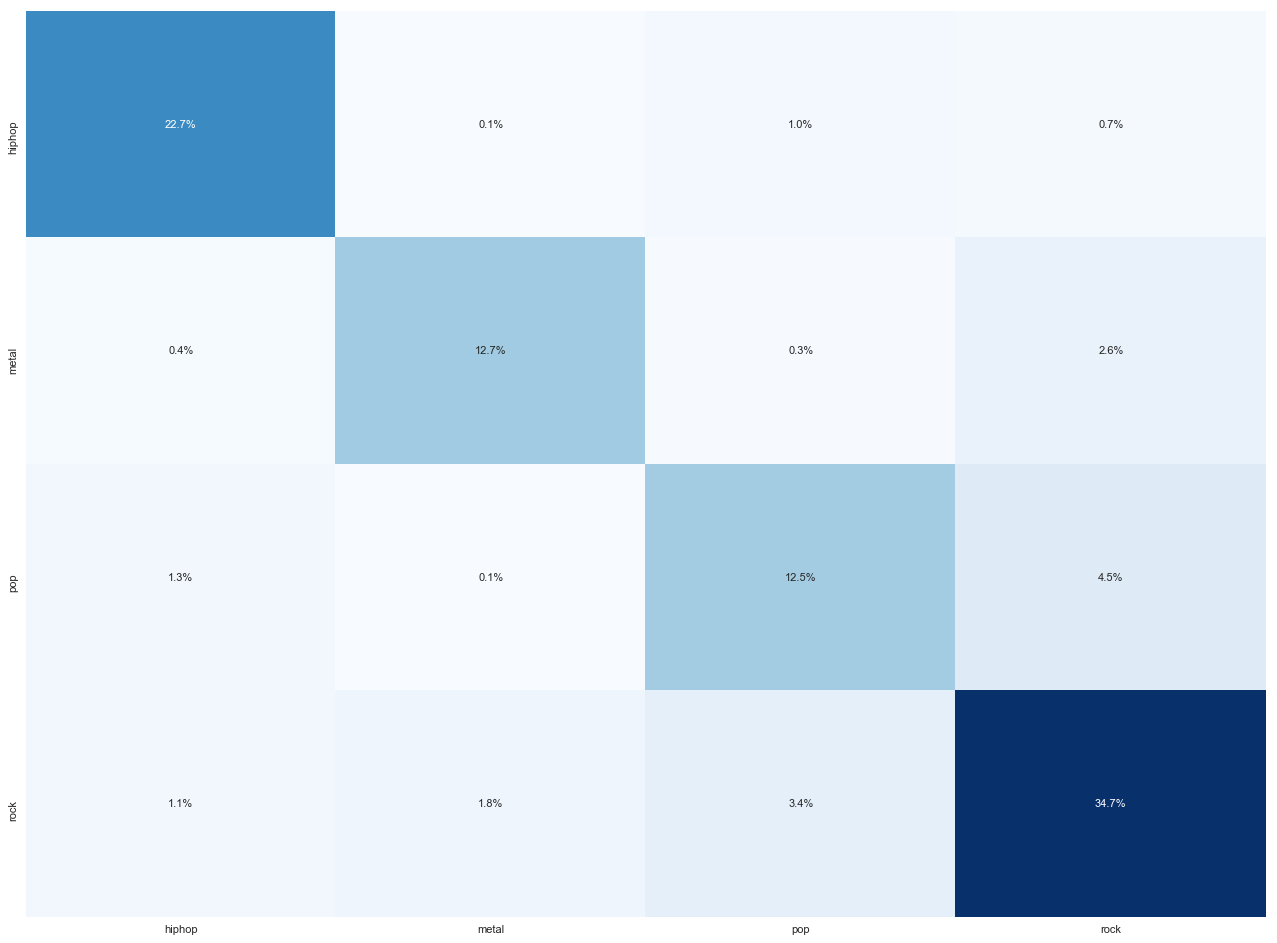

In [92]:
dfs = list(map(lambda path: pd.read_csv(os.getcwd() + '/' + path), glob.glob('**/*')))
df = pd.concat(dfs).drop(columns=['Unnamed: 0'])
df.columns = ['artist', 'genre', 'song', 'lyrics']

y = df['genre']
X = df['lyrics']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.4, random_state = 240008947)

pipeline_model = Pipeline([('counter', CountVectorizer(stop_words='english')),
                            ('model', MultinomialNB())])

pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(X_test)

print(classification_report(y_test, y_hat))

cnf = confusion_matrix(y_test, y_hat) / len(y_test)
sns.heatmap(cnf, xticklabels=pipeline_model.classes_, yticklabels=pipeline_model.classes_, annot=True, fmt=".1%", cbar=False, cmap='Blues');

Podemos ver que la precisión del género pop subió a un 71% y el hiphop subió a un 90%

- Mejoró el `f1 score` de todas las categorías, así como también `precision` y `recall`